### T test

A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types:
    
    1) One sampled t-test
   
    2) Two sampled t-test

### One sampled t-test

This test will tell us whether means of the sample and the population are different

#### t = (x_mean - mu)/S_x_mean

#### where S_x_mean = s / sqrt(n)

where,

mu = proposed constant for the population mean

x_mean = sample mean

n = sample size

s = sample standard deviation

S_x_mean = Estimated standard error of the mean (s/sqrt(n))

In [16]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [3]:
len(ages)

32

Thus the population length is 32

In [4]:
ages_mean = np.mean(ages)
ages_mean

30.34375

Thus actual population mean is 30.34375

Null hypothesis H0 => no difference b/w sample & population mean

Alternate hypothesis H1 => difference b/w sample & population mean

##### Consider a sample

In [5]:
sample_size = 10
age_samples = np.random.choice(ages, sample_size)
age_samples

array([25, 50, 18, 19, 20, 43, 23, 43, 16, 27])

In [6]:
# let population mean be 30
t_test, p_value = stats.ttest_1samp(age_samples, 30)

In [7]:
p_value

0.6898785119319655

In [8]:
if p_value < 0.05:
    print("Null hypothesis rejected")
else:
    print("Null hypothesis accepted")

Null hypothesis accepted


#### Age of students in college (population) & Class (sample)

In [28]:
np.random.seed(6)
school_ages = stats.poisson.rvs(loc=18, mu=35, size=1500)
class_ages = stats.poisson.rvs(loc=18, mu=30, size=60)

Text(0.5, 1.0, 'Population Distribution')

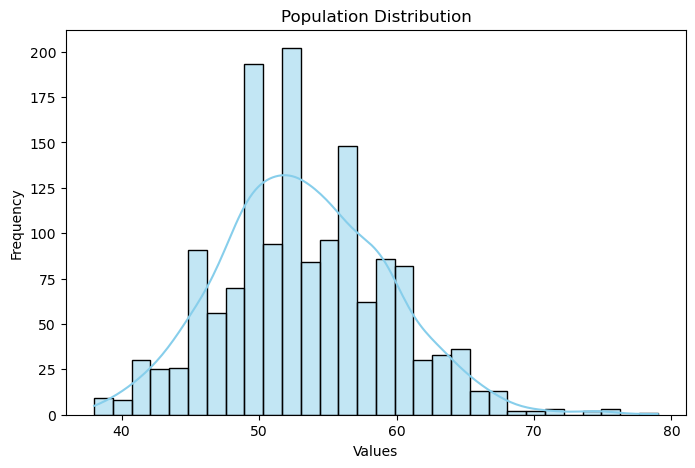

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(school_ages, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Population Distribution")

Text(0.5, 1.0, 'Sample Distribution')

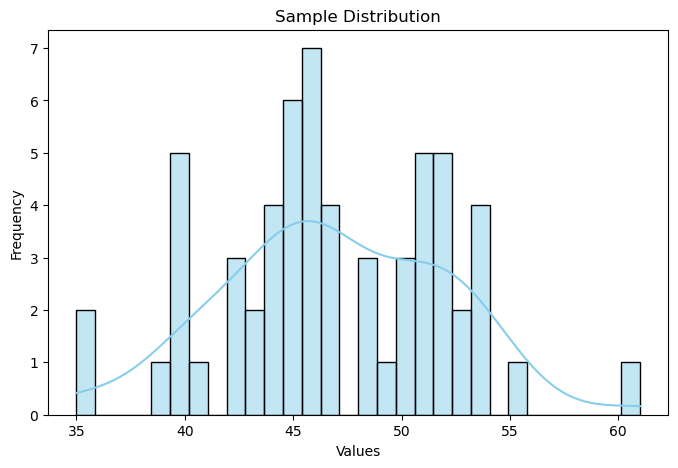

In [19]:
plt.figure(figsize=(8, 5))
sns.histplot(class_ages, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Sample Distribution")

In [10]:
school_ages.mean()

53.303333333333335

In [11]:
class_ages.mean()

46.9

In [12]:
t_test, p_value = stats.ttest_1samp(class_ages, school_ages.mean())

In [13]:
print(p_value)

1.139027071016194e-13


In [14]:
if p_value < 0.05:
    print("Null hypothesis rejected")
else:
    print("Null hypothesis accepted")

Null hypothesis rejected


That means, there is a difference between sample & population means

### Two sample t-test

The Independent samples t-test or 2 sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The independent samples t-test is a parametric test. This test is also known as Independent t-test

Null hypothesis H0 => no statistical difference b/w the 2 independent groups mean

Alternate hypothesis H1 => statistical difference b/w the 2 independent groups mean

![2 samplet Test](2sampletTest.png)

In [22]:
np.random.seed(12)
classB_ages = stats.poisson.rvs(loc=18, mu=33, size=60)

Text(0.5, 1.0, 'Sample Distribution')

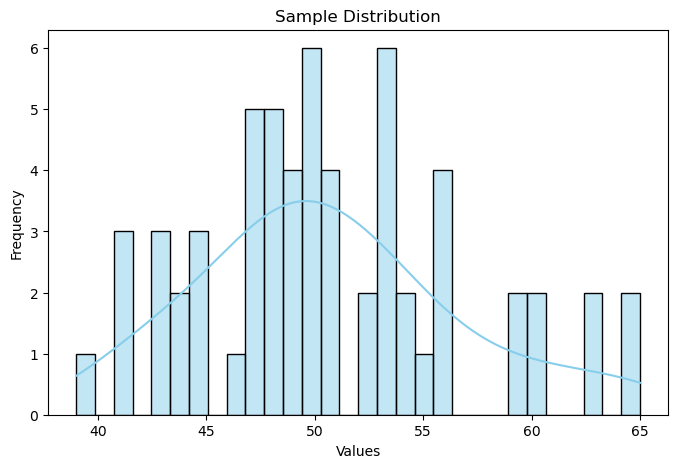

In [24]:
plt.figure(figsize=(8, 5))
sns.histplot(classB_ages, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Sample Distribution")

In [25]:
classB_ages.mean()

50.63333333333333

In [29]:
t_test, p_value = stats.ttest_ind(class_ages, classB_ages, equal_var=False)

In [30]:
p_value

0.00039942095100859375

In [31]:
if p_value < 0.05:
    print("Null hypothesis rejected")
else:
    print("Null huypothesis accepted")

Null hypothesis rejected


That means there is a significant difference b/w the 2 groups

### Paired t-Test

When you want to check how different samples from the same group are

In [32]:
weight1 = [25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]

In [33]:
len(weight1)

15

In [34]:
weight2 = weight1 + stats.norm.rvs(scale=5, loc=-1.25, size=len(weight1))

In [35]:
len(weight2)

15

Text(0.5, 1.0, 'Sample Distribution')

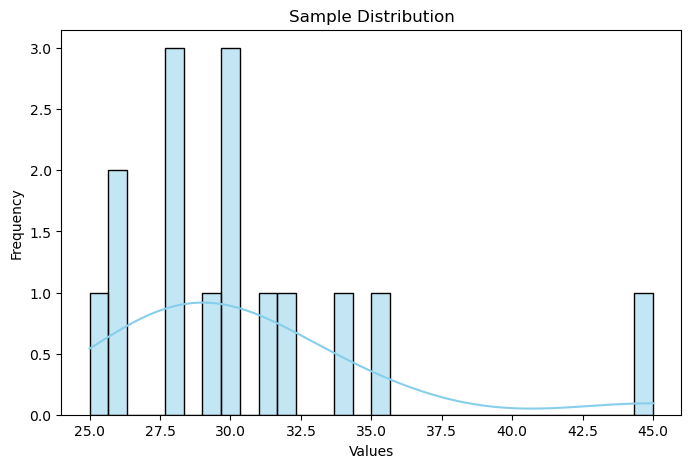

In [36]:
plt.figure(figsize=(8, 5))
sns.histplot(weight1, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Sample Distribution")

Text(0.5, 1.0, 'Sample Distribution')

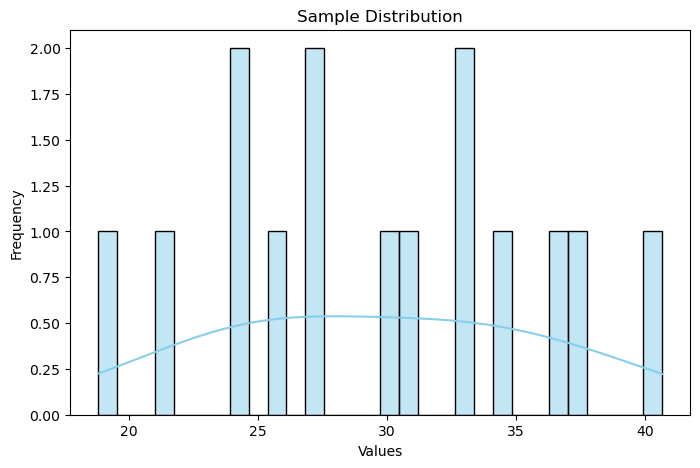

In [37]:
plt.figure(figsize=(8, 5))
sns.histplot(weight2, bins=30, kde=True, color="skyblue", edgecolor="black")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Sample Distribution")

In [38]:
weight1

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]

In [39]:
weight2

array([23.97614363, 26.85249356, 24.1373696 , 27.16615209, 32.74902935,
       37.51232196, 18.81017209, 33.31296285, 30.20472761, 25.47138779,
       21.60004812, 34.32284878, 36.99043308, 30.7551601 , 40.64860465])

In [40]:
weights_df = pd.DataFrame({"weight_1":np.array(weight1),
                          "weight_2":np.array(weight2),
                          "weight_diff":np.array(weight2)-np.array(weight1)})

In [41]:
weights_df

,weight_1,weight_2,weight_diff
0,25,23.976144,-1.023856
1,30,26.852494,-3.147506
2,28,24.137370,-3.862630
3,35,27.166152,-7.833848
4,28,32.749029,4.749029
5,34,37.512322,3.512322
6,26,18.810172,-7.189828
7,29,33.312963,4.312963
8,30,30.204728,0.204728
9,26,25.471388,-0.528612


In [42]:
t_test, p_value = stats.ttest_rel(weight1, weight2)

In [43]:
p_value

0.4858219692122552

In [44]:
if p_value < 0.05:
    print("Null hypothesis rejected")
else:
    print("Null hypothesis accepted")

Null hypothesis accepted


That means, no statistical difference is there b/w the 2 groups

### Correlation

In [45]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [46]:
df.shape

(150, 5)

In [48]:
df.iloc[:,:-1].corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


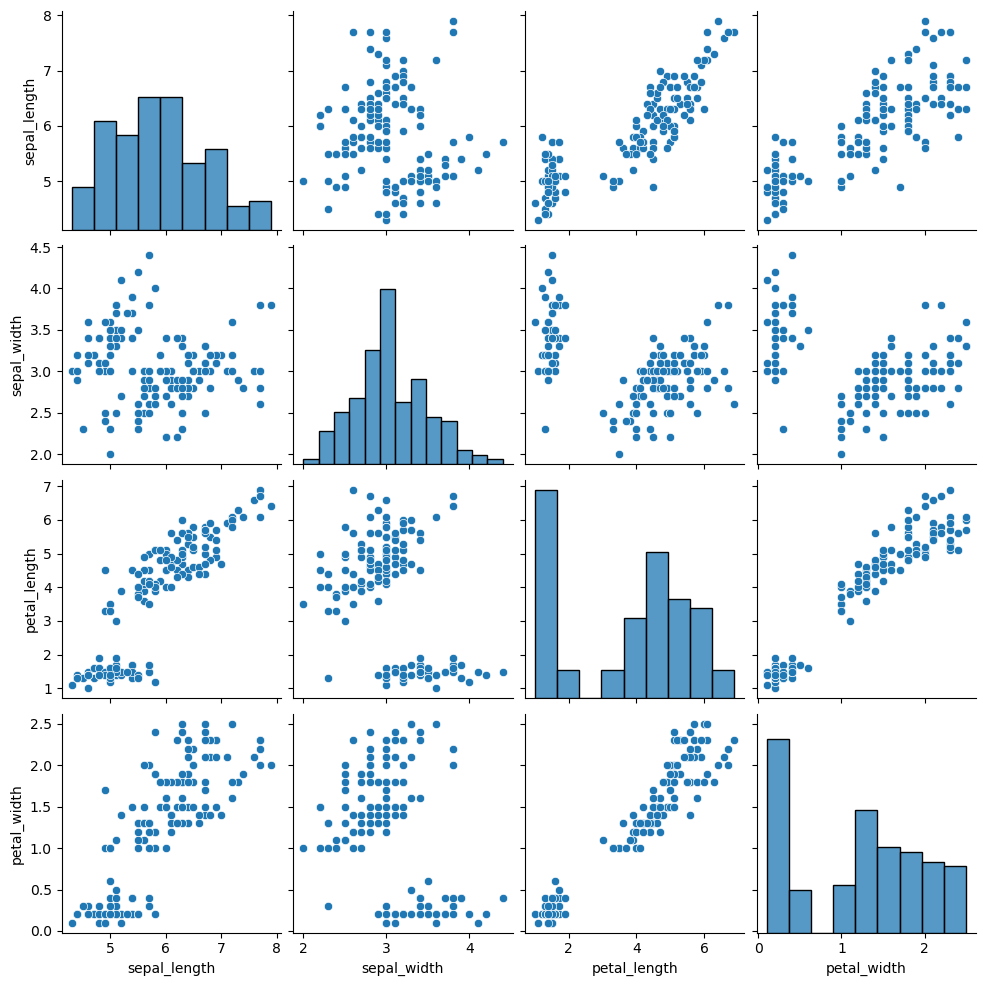

In [49]:
sns.pairplot(df)

Pairplots helps in visualizing the correlation

Clearly visible that petal_length & petal_width are highly correlated